**Here's a step-by-step explanation of the code:**

**Data Loading and Preprocessing:**
The code starts by importing the necessary libraries, such as pandas, numpy, statsmodels, sklearn, matplotlib, and emcee.
It loads the media marketing data from a CSV file using pd.read_csv.
The 'DATE' column is converted to datetime format using pd.to_datetime.





**Part 1:** Classical Marketing Data Modelling:
The code filters the data for the training period using the specified start and end dates.
It prepares the training data by selecting the relevant independent variables (X_train) and the dependent variable (y_train).
A constant term is added to the independent variables using sm.add_constant to account for the intercept in the regression model.
The ordinary least squares (OLS) regression model is fitted using sm.OLS by passing y_train and X_train as arguments.
The model summary is printed using result.summary().
Prediction and Evaluation:
The code filters the data for the test period using the specified start and end dates.
It prepares the test data by selecting the independent variables (X_test) and the dependent variable (y_test).
A constant term is added to the test data using sm.add_constant.
The model is used to make predictions on the test data using result.predict.
The root mean squared error (RMSE) and R-squared values are computed to evaluate the predictive performance of the model.
The RMSE and R-squared values are printed.
Plotting Predicted vs Actual Values:
A line plot is created to visualize the actual and predicted values for the test period using plt.plot.
A shaded region is added to represent the 95% confidence interval using plt.fill_between.
The plot is displayed using plt.show.
Temporal Effects:
An ARIMA model is created using the training data to capture temporal effects.
The ARIMA model summary is printed using model_fit.summary().


**Part 2:** Bayesian Model Estimation:
The log-likelihood function, log-prior function, and log-posterior function are defined.
The training data is prepared by selecting the independent variables (x_train) and the dependent variable (y_train).
The number of dimensions (ndim) and walkers (nwalkers) for the MCMC sampling are set.
The initial guess for the walkers is generated using np.random.randn.
The sampler is set up using emcee.EnsembleSampler with the defined log-posterior function and the training data.
The MCMC sampling is performed using sampler.run_mcmc.
The samples from the MCMC chains are extracted using sampler.get_chain.
Plotting Posterior Distributions:
The posterior distributions of the model parameters are plotted using subplots.
The plot displays the trace plots for each parameter using ax.plot.
The labels for each parameter are set using ax.set_ylabel.
The x-label is set as "Step number" using axes[-1].set_xlabel.
The plot is displayed using plt.show.

In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import emcee

# Load the data
df = pd.read_csv("weekly_media_sample.csv")

# Convert 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Filter the data for the training period
train_start_date = pd.to_datetime('2012-08-06')
train_end_date = pd.to_datetime('2016-05-30')
df_train = df[(df['DATE'] >= train_start_date) & (df['DATE'] <= train_end_date)]


In [56]:
# 1a: Modelling
# Prepare the data
X_train = df_train[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']]
y_train = df_train['revenue']

# Add a constant to the independent variables
X_train = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train)
result = model.fit()

# Print model summary
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     244.8
Date:                Fri, 12 May 2023   Prob (F-statistic):           9.58e-82
Time:                        19:48:23   Log-Likelihood:                -2781.0
No. Observations:                 200   AIC:                             5574.
Df Residuals:                     194   BIC:                             5594.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.959e+04   5.43e+04  

RMSE: 50361.289034879956
R-squared: 0.9298715098201418


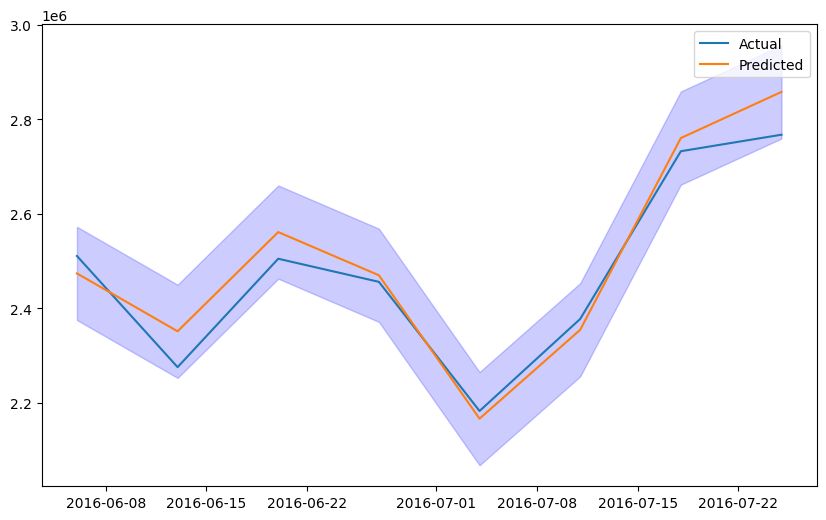

In [57]:
# 1b: Prediction
# Filter the data for the test period
test_start_date = pd.to_datetime('2016-06-06')
test_end_date = pd.to_datetime('2016-07-25')
df_test = df[(df['DATE'] >= test_start_date) & (df['DATE'] <= test_end_date)]

# Prepare the test data
X_test = df_test[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']]
y_test = df_test['revenue']

# Add a constant to the test data
X_test = sm.add_constant(X_test)

# Make predictions
predictions = result.predict(X_test)

# Compute RMSE and R-squared for model evaluation
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

# Print RMSE and R-squared
print('RMSE:', rmse)
print('R-squared:', r2)

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(df_test['DATE'], y_test, label='Actual')
plt.plot(df_test['DATE'], predictions, label='Predicted')
plt.fill_between(df_test['DATE'], predictions - 1.96 * rmse, predictions + 1.96 * rmse, color='b', alpha=0.2)
plt.legend()
plt.show()



In [58]:
# 1c: Temporal effects
# ARIMA Model
model_arima = ARIMA(df_train['revenue'], order=(1, 0, 0))
model_fit = model_arima.fit()

# Print ARIMA model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2879.834
Date:                Fri, 12 May 2023   AIC                           5765.668
Time:                        19:48:41   BIC                           5775.563
Sample:                             0   HQIC                          5769.673
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.796e+06   1.51e+05     11.877      0.000     1.5e+06    2.09e+06
ar.L1          0.7983      0.046     17.305      0.000       0.708       0.889
sigma2      1.865e+11      0.529   3.52e+11      0.0

100%|██████████| 3000/3000 [00:12<00:00, 232.85it/s]


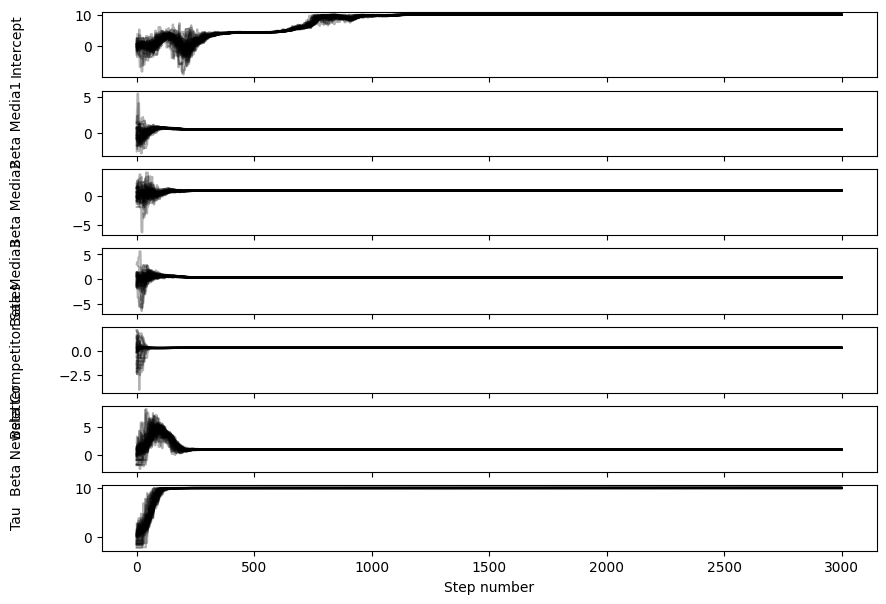

In [60]:
# 2a: Bayesian model estimation
# Define the log-likelihood function
def log_likelihood(theta, x, y):
    intercept, beta_media1, beta_media2, beta_media3, beta_competitor_sales, beta_newsletter, tau = theta
    mu = intercept + beta_media1 * x[:, 0] + beta_media2 * x[:, 1] + beta_media3 * x[:, 2] + \
         beta_competitor_sales * x[:, 3] + beta_newsletter * x[:, 4]
    sigma = np.sqrt(tau)
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - mu) ** 2 / sigma ** 2)

# Define the log-prior function
def log_prior(theta):
    intercept, beta_media1, beta_media2, beta_media3, beta_competitor_sales, beta_newsletter, tau = theta
    if -10 < intercept < 10 and -10 < beta_media1 < 10 and -10 < beta_media2 < 10 and -10 < beta_media3 < 10 \
            and -10 < beta_competitor_sales < 10 and -10 < beta_newsletter < 10 and 0 < tau < 10:
        return 0.0
    return -np.inf

# Define the log-posterior function
def log_posterior(theta, x, y):
    log_prior_val = log_prior(theta)
    if np.isinf(log_prior_val):
        return log_prior_val
    return log_prior_val + log_likelihood(theta, x, y)

# Prepare the data
x_train = df_train[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']].values
y_train = df_train['revenue'].values

# Set the number of dimensions and walkers
ndim = 7
nwalkers = 50

# Initialize the walkers
initial_guess = np.random.randn(nwalkers, ndim)

# Set up the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x_train, y_train))

# Run the MCMC sampling
sampler.run_mcmc(initial_guess, 3000, progress=True)

# Get the samples
samples = sampler.get_chain()

# Plot the posterior distributions
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
labels = ['Intercept', 'Beta Media1', 'Beta Media2', 'Beta Media3', 'Beta Competitor Sales',
          'Beta Newsletter', 'Tau']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("Step number")
plt.show()
